In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Os Dados

Estaremos utilizando dados de um conjunto de dados do Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Colunas de Características
    
* id - ID único para cada casa vendida
* date - Data da venda da casa
* price - Preço de cada casa vendida
* bedrooms - Número de quartos
* bathrooms - Número de banheiros, onde .5 representa um quarto com vaso sanitário, mas sem chuveiro
* sqft_living - Metragem quadrada do espaço interno do apartamento
* sqft_lot - Metragem quadrada do terreno
* floors - Número de andares
* waterfront - Uma variável fictícia que indica se o apartamento tem vista para o mar ou não
* view - Um índice de 0 a 4 que indica a qualidade da vista da propriedade
* condition - Um índice de 1 a 5 que indica a condição do apartamento
* grade - Um índice de 1 a 13, onde 1-3 indica uma construção e design abaixo do padrão, 7 indica um nível médio de construção e design, e 11-13 indica um nível de construção e design de alta qualidade.
* sqft_above - Metragem quadrada do espaço interno da habitação acima do nível do solo
* sqft_basement - Metragem quadrada do espaço interno da habitação abaixo do nível do solo
* yr_built - O ano em que a casa foi inicialmente construída
* yr_renovated - O ano da última reforma da casa
* zipcode - Área do código postal em que a casa está localizada
* lat - Latitude
* long - Longitude
* sqft_living15 - Metragem quadrada do espaço interno da habitação para os 15 vizinhos mais próximos
* sqft_lot15 - Metragem quadrada dos terrenos dos 15 vizinhos mais próximos

In [2]:
df = pd.read_csv('../Data/kc_house_data.csv')

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().T  # .T == .transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
sns.set_style('white')

<Figure size 1000x600 with 0 Axes>

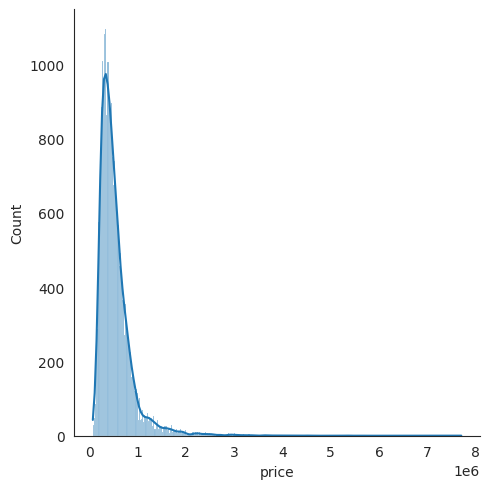

In [127]:
plt.figure(figsize=(10,6))
sns.displot(df['price'], kde=True)

<Axes: xlabel='bedrooms', ylabel='count'>

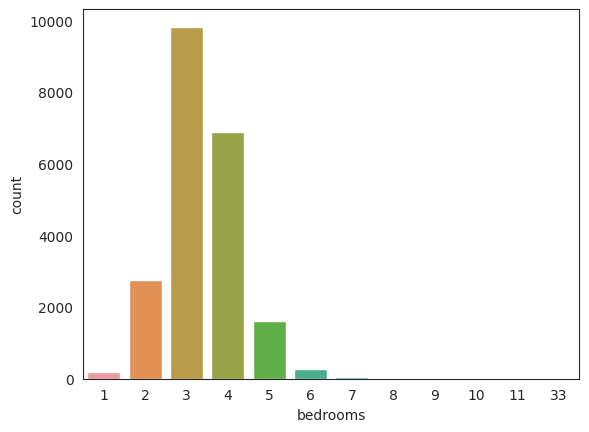

In [12]:
sns.countplot(data=df, x='bedrooms')

<Axes: >

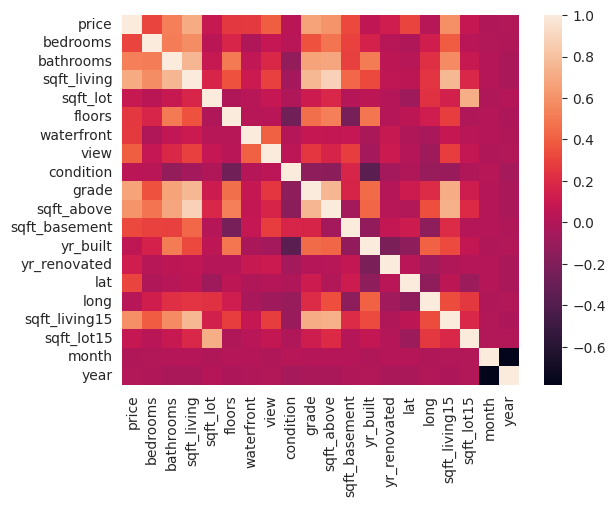

In [130]:
sns.heatmap(df.corr())

In [141]:
corr_df = df.corr()['price'].drop('price')

In [142]:
corr_df[corr_df == corr_df.max()]

sqft_living    0.701917
Name: price, dtype: float64

In [148]:
df.corr()['price'].drop('price').sort_values(ascending=False).head(3)

sqft_living    0.701917
grade          0.667951
sqft_above     0.605368
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

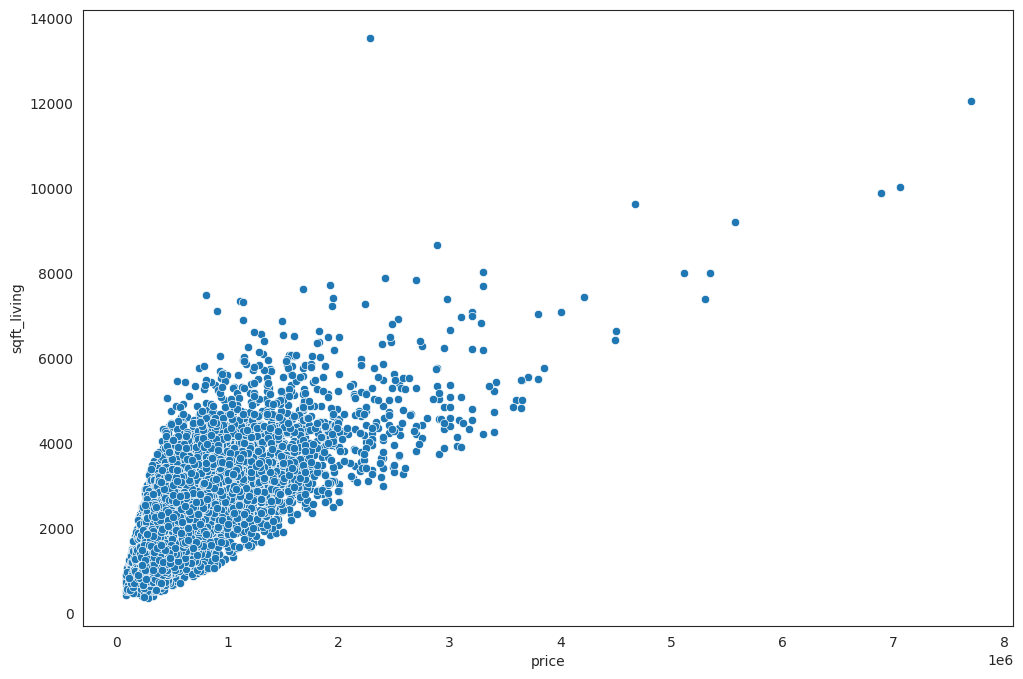

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

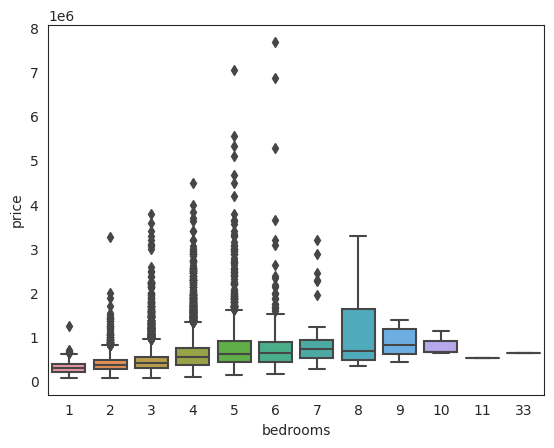

In [14]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='price', ylabel='long'>

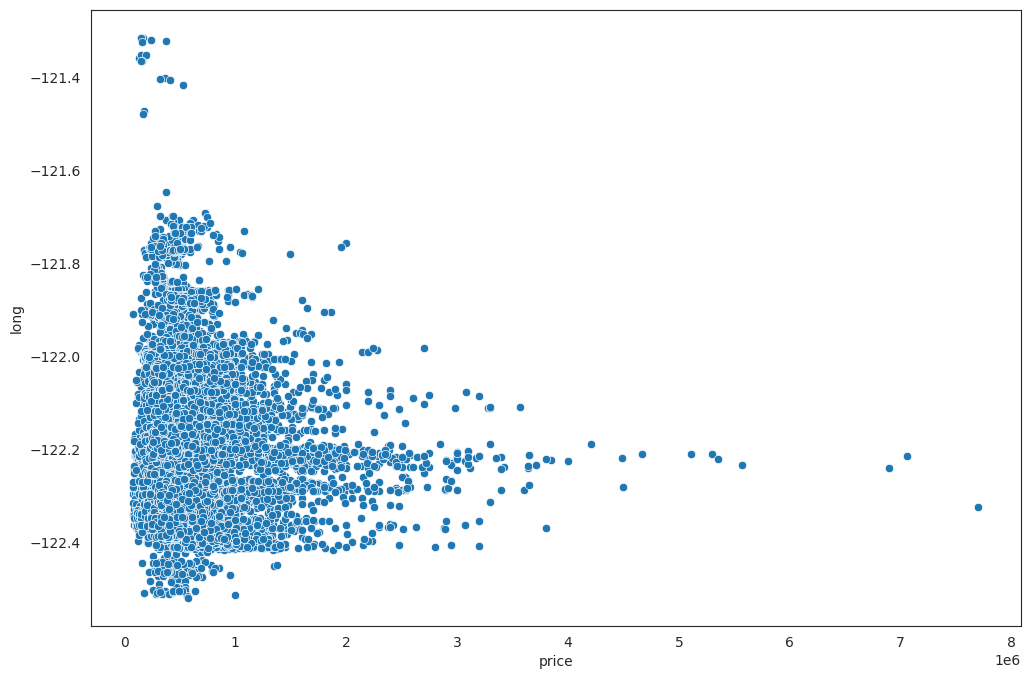

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

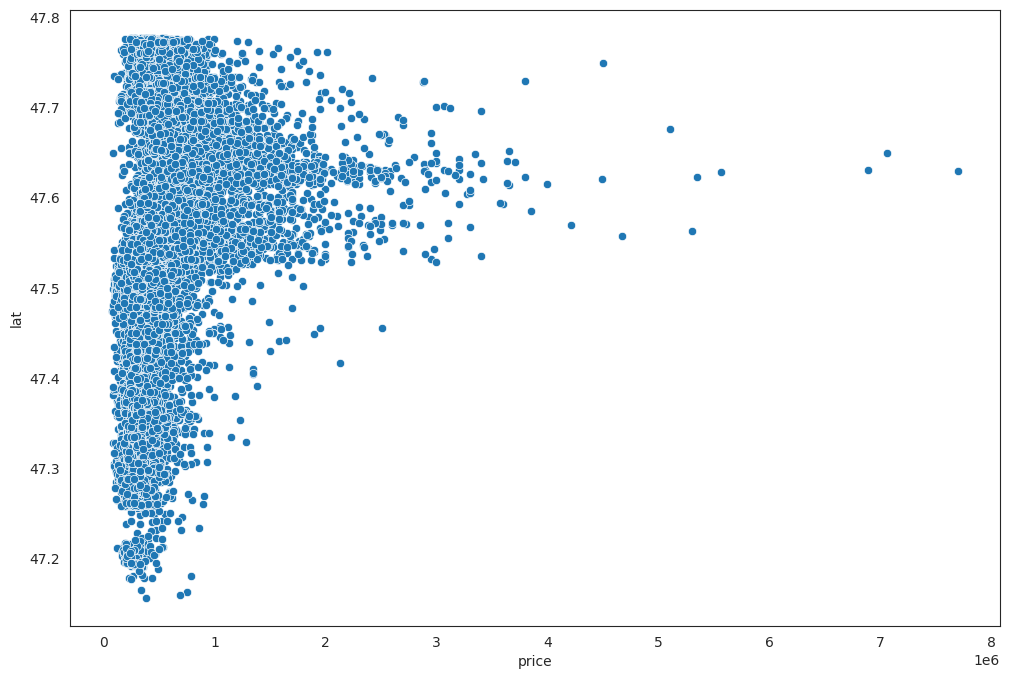

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

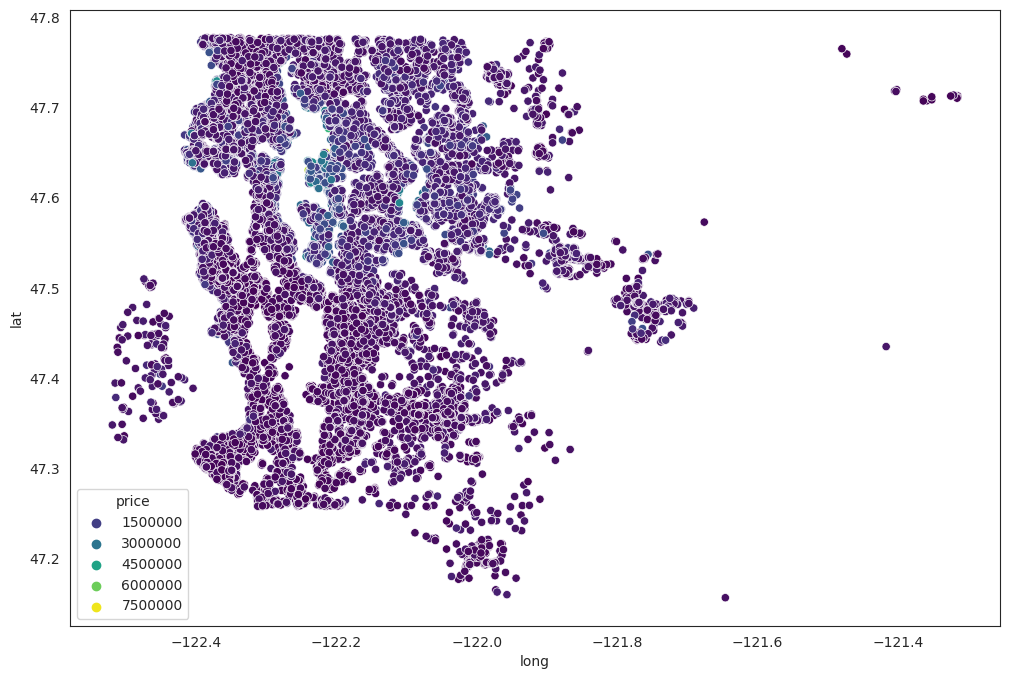

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price', palette='viridis')

In [21]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [22]:
len(df)*(.01)

215.97

In [23]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [26]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<Axes: xlabel='long', ylabel='lat'>

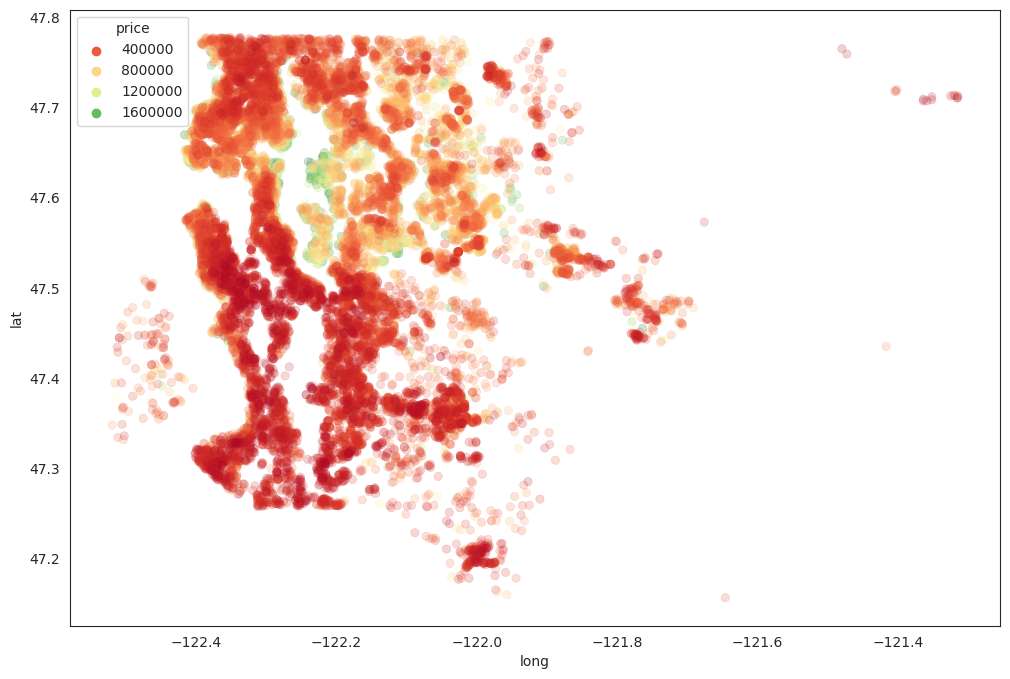

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='long', y='lat', hue='price',
    data=non_top_1_perc,
    palette='RdYlGn',
    edgecolor=None, # deixa com esse 'blur'
    alpha=.2
)

<Axes: xlabel='waterfront', ylabel='price'>

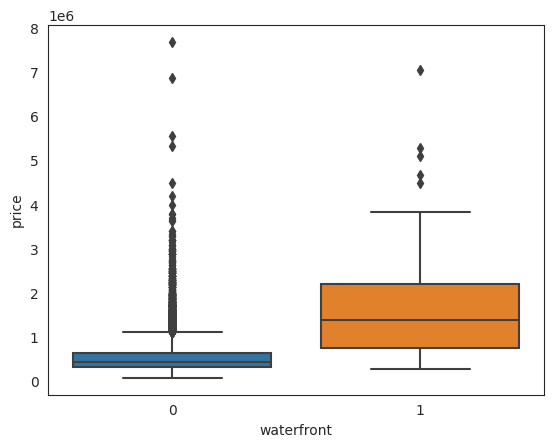

In [32]:
sns.boxplot(x='waterfront', y='price', data=df)

In [33]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [35]:
df.drop('id', axis=1, inplace=True)

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)

In [38]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<Axes: xlabel='year', ylabel='price'>

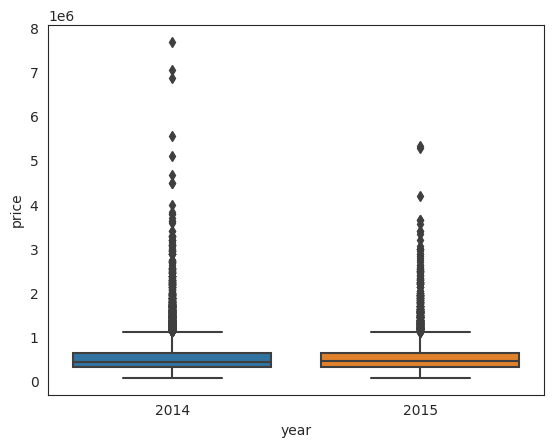

In [39]:
sns.boxplot(x='year', y='price', data=df)

<Axes: xlabel='month', ylabel='price'>

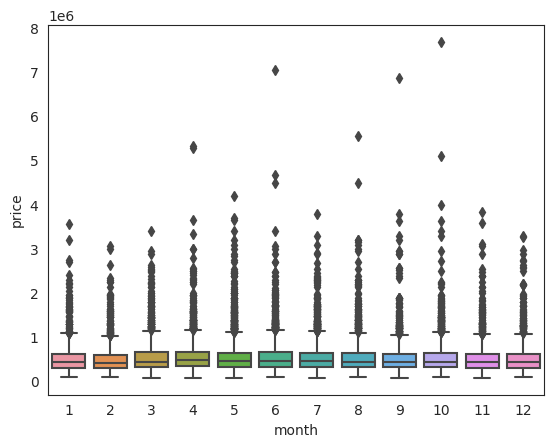

In [40]:
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='month'>

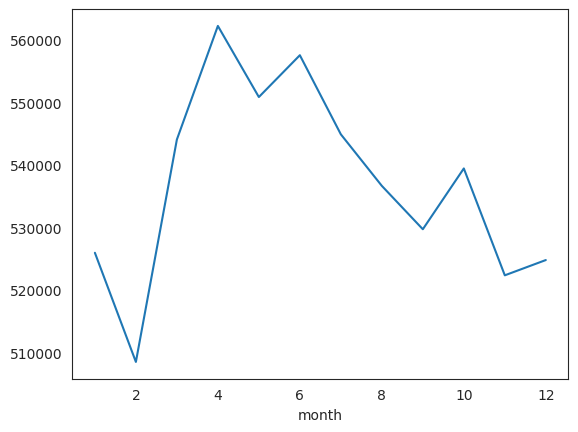

In [47]:
df.groupby('month')['price'].mean().plot()

<Axes: xlabel='year'>

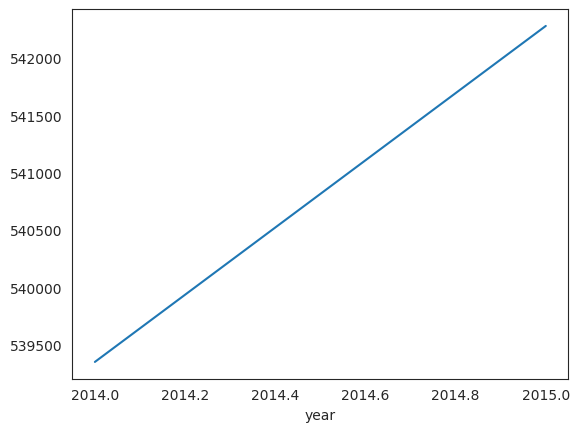

In [48]:
df.groupby('year')['price'].mean().plot()

In [49]:
df.drop('date', axis=1, inplace=True)

In [50]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [51]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [52]:
df.drop('zipcode', axis=1, inplace=True)

In [53]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [54]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [55]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

## Scaling and Train Test Split

In [56]:
X = df.drop('price', axis=1)
y = df['price']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=101
)

### Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(15117, 19)

In [64]:
X_test.shape

(6480, 19)

## Creating a Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [66]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

## Training Model

In [67]:
model.fit(
    x=X_train, y=y_train.values,
    validation_data=(X_test, y_test.values),
    batch_size=128,
    epochs=400
)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430233944064.0000 - val_loss: 418886483968.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428921487360.0000 - val_loss: 414454251520.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411729756160.0000 - val_loss: 375767007232.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 331121098752.0000 - val_loss: 248454660096.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 179293503488.0000 - val_loss: 112863813632.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 103318159360.0000 - val_loss: 94556160000.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96911695872.0000 - val_loss: 93029974016.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95259754496.0000 - val_loss: 91451858944.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38147715072.0000 - val_loss: 36874149888.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 37923282944.0000 - val_loss: 36665421824.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 37731323904.0000 - val_loss: 36412317696.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37517230080.0000 - val_loss: 36223643648.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37333049344.0000 - val_loss: 36069937152.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37167869952.0000 - val_loss: 35863506944.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37013975040.0000 - val_loss: 35699560448.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 36857364480.0000 - val_loss: 35544915968.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32828925952.0000 - val_loss: 31266060288.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32795428864.0000 - val_loss: 31240456192.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32788633600.0000 - val_loss: 31172804608.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32805392384.0000 - val_loss: 31203055616.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32695224320.0000 - val_loss: 31126319104.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32698359808.0000 - val_loss: 31077996544.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32665497600.0000 - val_loss: 31064590336.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32639475712.0000 - val_loss: 31001655296.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31453235200.0000 - val_loss: 29627926528.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31373156352.0000 - val_loss: 29659762688.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31408453632.0000 - val_loss: 29632974848.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31372066816.0000 - val_loss: 29611808768.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31357489152.0000 - val_loss: 29528334336.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31309649920.0000 - val_loss: 29518530560.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31318464512.0000 - val_loss: 29495762944.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31310741504.0000 - val_loss: 29471479808.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30644731904.0000 - val_loss: 28588423168.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30732025856.0000 - val_loss: 28643215360.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30627985408.0000 - val_loss: 28765046784.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30653896704.0000 - val_loss: 28634744832.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30593865728.0000 - val_loss: 28573931520.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30603866112.0000 - val_loss: 28562964480.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30580875264.0000 - val_loss: 28548528128.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30603321344.0000 - val_loss: 28522975232.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30060457984.0000 - val_loss: 27854098432.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30069516288.0000 - val_loss: 27813750784.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30043013120.0000 - val_loss: 27799816192.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30036252672.0000 - val_loss: 27839598592.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30064252928.0000 - val_loss: 27812360192.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30009743360.0000 - val_loss: 27863056384.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29988765696.0000 - val_loss: 27738060800.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29977935872.0000 - val_loss: 27751800832.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29171337216.0000 - val_loss: 26797645824.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29142362112.0000 - val_loss: 26908157952.0000


In [68]:
losses = pd.DataFrame(model.history.history)

In [151]:
losses.head(20)

,loss,val_loss
0,4.302339e+11,4.188865e+11
1,4.289215e+11,4.144543e+11
2,4.117298e+11,3.757670e+11
3,3.311211e+11,2.484547e+11
4,1.792935e+11,1.128638e+11
5,1.033182e+11,9.455616e+10
6,9.691170e+10,9.302997e+10
7,9.525975e+10,9.145186e+10
8,9.358812e+10,8.987755e+10
9,9.186499e+10,8.831308e+10


<Axes: >

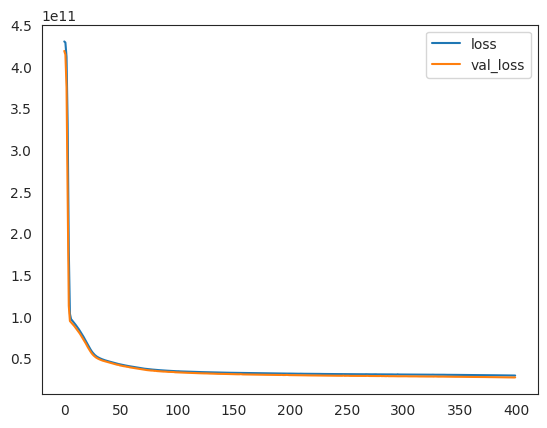

In [69]:
losses.plot()

## Evaluation on Test Data

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Predicting on Brand New Data

In [73]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [74]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 752us/step


In [75]:
mean_absolute_error(y_test, predictions)

101935.60095486112

In [76]:
mean_squared_error(y_test, predictions)

26908158252.095448

In [77]:
explained_variance_score(y_test, predictions)

0.7975173770508186

In [78]:
df['price'].mean()

540296.5735055795

In [79]:
df['price'].median()

450000.0

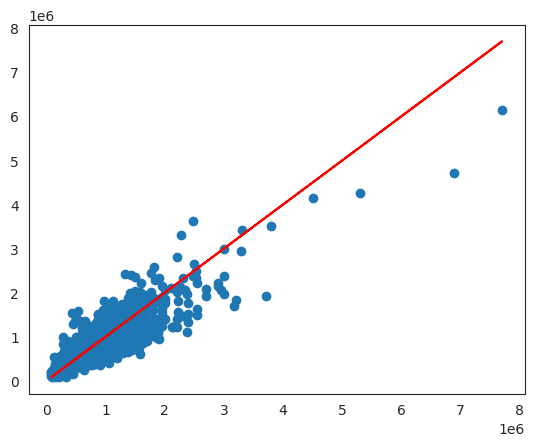

In [81]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [86]:
errors = y_test.values.reshape(6480, 1) - predictions

In [96]:
print(errors)

[[-104956.96875]
 [-126952.8125 ]
 [ -93559.9375 ]
 ...
 [  24054.4375 ]
 [-143814.875  ]
 [ 541983.875  ]]


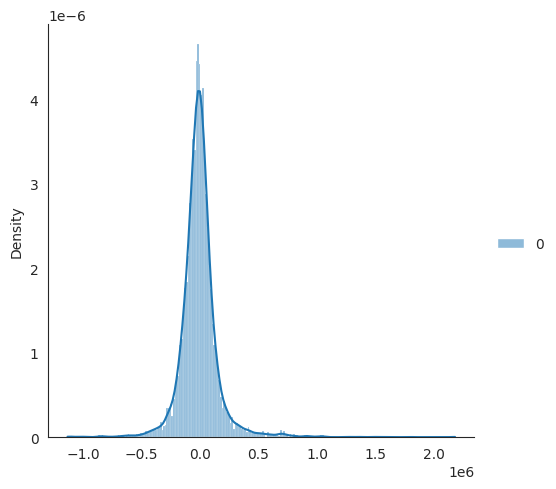

In [101]:
sns.displot(errors, kde=True, stat='density')

### Predicting on a brand new house

In [102]:
single_house = df.drop('price', axis=1).iloc[0]

In [103]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [112]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  1.00000e+01,  2.01400e+03])

In [111]:
single_house.values.shape # → 19 linhas e 0 colunas

(19,)

In [113]:
for i in single_house.values:
    print(i)

3.0
1.0
1180.0
5650.0
1.0
0.0
0.0
3.0
7.0
1180.0
0.0
1955.0
0.0
47.5112
-122.257
1340.0
5650.0
10.0
2014.0


In [108]:
single_house.values.reshape(-1, 19) # → 1 linha e 19 colunas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [114]:
for i in single_house.values.reshape(-1, 19):
    print(i)

[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
  0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
  0.00000e+00  1.95500e+03  0.00000e+00  4.75112e+01 -1.22257e+02
  1.34000e+03  5.65000e+03  1.00000e+01  2.01400e+03]


In [115]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

/home/kauas/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [116]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [119]:
pred = model.predict(single_house)
pred

1/1 [==============================] - 0s 17ms/step


array([[290706.]], dtype=float32)

In [118]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [126]:
print((pred - df.iloc[0]['price']).reshape(1))

[68806.]
